In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from geobr import read_state
from geobr import read_municipality
%matplotlib inline

,code_muni,name_muni,code_state,abbrev_state,geometry
0,1100015.0,Alta Floresta D'oeste,11,RO,"MULTIPOLYGON (((-62.23224 -11.90804, -62.20670..."
1,1100023.0,Ariquemes,11,RO,"MULTIPOLYGON (((-63.57327 -9.78326, -63.57016 ..."
2,1100031.0,Cabixi,11,RO,"MULTIPOLYGON (((-60.71834 -13.39058, -60.70904..."
3,1100049.0,Cacoal,11,RO,"MULTIPOLYGON (((-61.27873 -11.50596, -61.28097..."
4,1100056.0,Cerejeiras,11,RO,"MULTIPOLYGON (((-61.41347 -13.23417, -61.42603..."
...,...,...,...,...,...
5567,5222005.0,Vianópolis,52,GO,"POLYGON ((-48.53842 -16.75003, -48.54051 -16.7..."
5568,5222054.0,Vicentinópolis,52,GO,"POLYGON ((-50.00189 -17.78179, -50.01420 -17.7..."
5569,5222203.0,Vila Boa,52,GO,"POLYGON ((-47.07742 -15.06330, -47.07851 -15.0..."
5570,5222302.0,Vila Propício,52,GO,"POLYGON ((-48.91463 -15.20939, -48.91532 -15.1..."


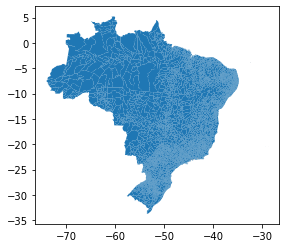

In [2]:
# Gerando shape do brasil dividido em estados com a biblioteca GEOBR
shape_br = read_state(code_state='all')
# shape_br.plot()

shape_counties = read_municipality(code_muni='all', year=2018)
shape_counties.plot()
shape_counties

In [20]:
nan_value = float("0")
data.replace("", nan_value, inplace=True)
data.dropna(subset = ["ratio"], inplace=True)

data

,Ano,Sexo,Armenor,60 a 65,65 a 70,70 a 75,75 a 80,80 a 85,85 a 90,90+,Total,f,m,ratio,old
0,2010,f,1200013,130,92,52,38,16,8,3,6206,339.0,521.0,0.650672,339
1,2010,m,1200013,188,128,88,72,32,9,4,6865,0.0,0.0,0.000000,521
2,2010,f,1200054,46,48,27,18,21,7,2,3123,169.0,208.0,0.812500,169
3,2010,m,1200054,71,48,37,25,12,12,3,3236,0.0,0.0,0.000000,208
4,2010,f,1200104,258,192,130,71,50,24,15,10785,740.0,881.0,0.839955,740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122535,2020,m,1721307,57,54,36,22,13,9,2,1328,0.0,0.0,0.000000,193
122536,2020,f,1722081,204,181,125,78,58,30,17,5328,693.0,752.0,0.921543,693
122537,2020,m,1722081,205,190,150,97,63,31,16,5516,0.0,0.0,0.000000,752
122538,2020,f,1722107,206,155,107,78,70,34,20,4995,670.0,619.0,1.082391,670


In [27]:
# Seleciona em 'pop_2010_2020.csv' apenas os atributos que vamos trabalhar
data = pd.read_csv('pop_2010_2020.csv')
data = data[['Ano','Sexo','Armenor', '60 a 65', '65 a 70', '70 a 75', '75 a 80', '80 a 85', '85 a 90', '90+', 'Total']]
data['60 a 65'] = data['60 a 65'].astype('int64')
data['65 a 70'] = data['65 a 70'].astype('int64')
data['70 a 75'] = data['70 a 75'].astype('int64')
data['75 a 80'] = data['75 a 80'].astype('int64')
data['80 a 85'] = data['80 a 85'].astype('int64')
data['85 a 90'] = data['85 a 90'].astype('int64')
data['90+'] = data['90+'].astype('int64')
data['Total'] = data['Total'].astype('int64')

data[["f", "m", "ratio"]] = ""
data['old'] = data['60 a 65'] + data['65 a 70'] + data['70 a 75'] + data['75 a 80'] + data['80 a 85'] + data['85 a 90'] + data['90+']

for i in range(len(data)):
    if i % 2 == 0:
        nextValue = data["old"][i + 1]
        currentValue = data["old"][i]
        data["f"][i] = currentValue
        data["m"][i] = nextValue
        if nextValue > 0: # Para contornar os NaN
            data["ratio"][i] = (currentValue)/(nextValue)

print(data)

<ipython-input-27-eab8e476980d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["f"][i] = currentValue
<ipython-input-27-eab8e476980d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["m"][i] = nextValue
<ipython-input-27-eab8e476980d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ratio"][i] = (currentValue)/(nextValue)


         Ano Sexo  Armenor  60 a 65  65 a 70  70 a 75  75 a 80  80 a 85  \
0       2010    f  1200013      130       92       52       38       16   
1       2010    m  1200013      188      128       88       72       32   
2       2010    f  1200054       46       48       27       18       21   
3       2010    m  1200054       71       48       37       25       12   
4       2010    f  1200104      258      192      130       71       50   
...      ...  ...      ...      ...      ...      ...      ...      ...   
122535  2020    m  1721307       57       54       36       22       13   
122536  2020    f  1722081      204      181      125       78       58   
122537  2020    m  1722081      205      190      150       97       63   
122538  2020    f  1722107      206      155      107       78       70   
122539  2020    m  1722107      164      153      105       90       56   

        85 a 90  90+  Total    f    m     ratio  old  
0             8    3   6206  339  521  0.650

In [28]:
data = data.drop(data[data.Sexo == "m"].index)

# Cria a coluna com o poligono representante de cada cidade e adiciona ela ao data_city
cities = shape_counties[['code_muni', 'geometry']]
data.reset_index(inplace=True)
data_city = data.merge(cities,how='inner', left_on='Armenor', right_on='code_muni')
data_city

,index,Ano,Sexo,Armenor,60 a 65,65 a 70,70 a 75,75 a 80,80 a 85,85 a 90,90+,Total,f,m,ratio,old,code_muni,geometry
0,0,2010,f,1200013,130,92,52,38,16,8,3,6206,339,521,0.650672,339,1200013.0,"MULTIPOLYGON (((-67.09001 -9.95789, -67.10019 ..."
1,11140,2011,f,1200013,139,98,58,39,18,8,3,6403,363,547,0.66362,363,1200013.0,"MULTIPOLYGON (((-67.09001 -9.95789, -67.10019 ..."
2,22280,2012,f,1200013,149,103,64,40,20,9,3,6607,388,577,0.672444,388,1200013.0,"MULTIPOLYGON (((-67.09001 -9.95789, -67.10019 ..."
3,33420,2013,f,1200013,160,108,71,42,23,9,4,6812,417,608,0.685855,417,1200013.0,"MULTIPOLYGON (((-67.09001 -9.95789, -67.10019 ..."
4,44560,2014,f,1200013,172,115,78,43,26,10,4,7025,448,643,0.696734,448,1200013.0,"MULTIPOLYGON (((-67.09001 -9.95789, -67.10019 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61265,77978,2016,f,1722107,181,130,102,94,57,29,18,5286,611,607,1.00659,611,1722107.0,"MULTIPOLYGON (((-48.38646 -6.38016, -48.38268 ..."
61266,89118,2017,f,1722107,188,137,103,89,60,30,19,5213,626,610,1.02623,626,1722107.0,"MULTIPOLYGON (((-48.38646 -6.38016, -48.38268 ..."
61267,100258,2018,f,1722107,194,143,105,85,64,31,19,5142,641,614,1.04397,641,1722107.0,"MULTIPOLYGON (((-48.38646 -6.38016, -48.38268 ..."
61268,111398,2019,f,1722107,200,149,106,81,67,33,19,5069,655,615,1.06504,655,1722107.0,"MULTIPOLYGON (((-48.38646 -6.38016, -48.38268 ..."


TypeError: '>=' not supported between instances of 'numpy.ndarray' and 'str'

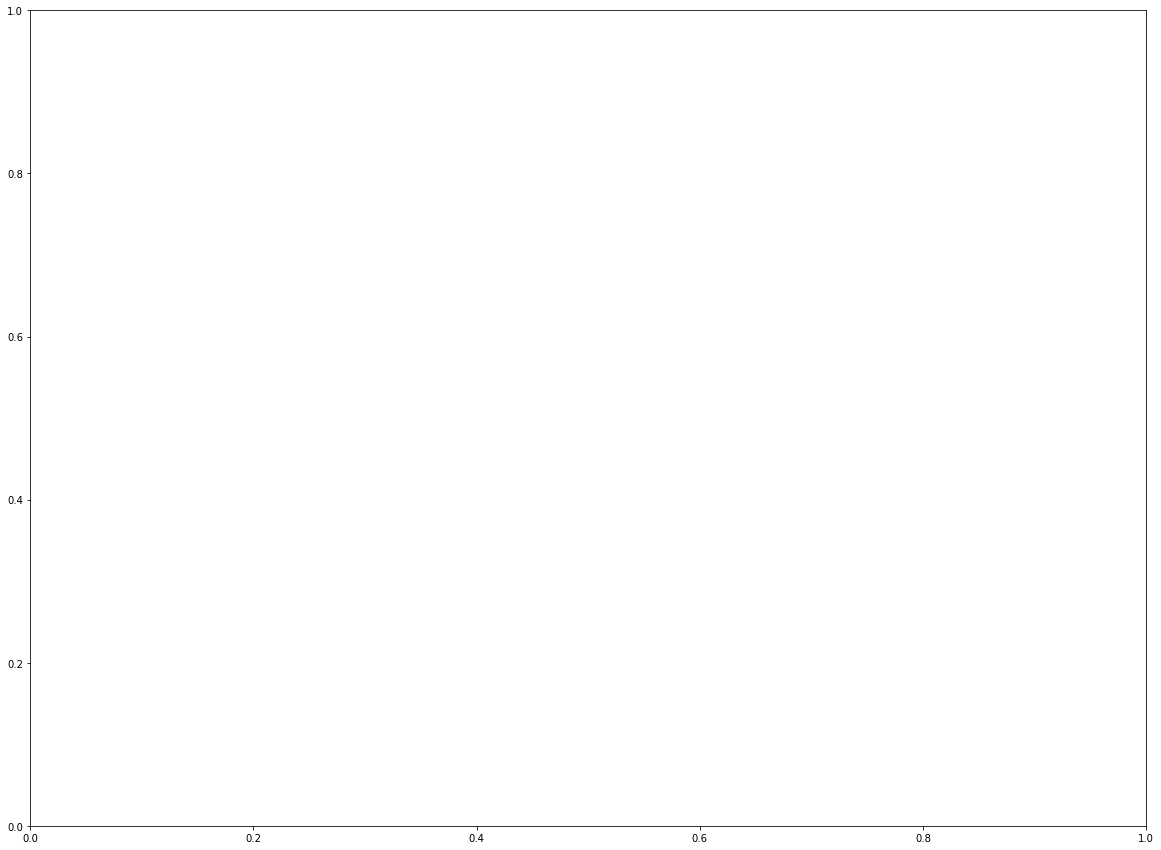

In [29]:
#Faz a plotagem dos mapas por semana epidemiológica 
for ano in range(2010,2021):
    ano_x = data_city[data_city.Ano == ano]
    
    #Fazendo o typecasting para GeoDataFrame
    ano_x = gpd.GeoDataFrame(ano_x)
    copy = gpd.GeoDataFrame(data_city)
    copy2 = shape_br
    copy2['coords'] = copy2['geometry'].apply(lambda x: x.representative_point().coords[:])
    copy2['coords'] = [coords[0] for coords in copy2['coords']]
    
    fig, ax = plt.subplots(figsize=(20, 15))
    ano_x.plot(column='ratio', cmap='rwb_r', vmin=0.0, legend=True,legend_kwds={'label': f"(Em %)", 'orientation': "vertical"},vmax=data_city['ratio'].max(), ax=ax)
    
    ax.annotate(f'Ano {ano}', xy=(0.1,.225),xycoords='figure fraction',horizontalalignment='left', verticalalignment='top',fontsize=35)
    copy2.geometry.boundary.plot(color=None,edgecolor='#888888',linewidth = 0.3,ax=ax)
    ax.set_title(f"Proporção de idosos por Município (em %)", fontdict={'fontsize':25})
    ax.axis('off')
    
    for i, j in copy2.iterrows():
        plt.annotate(s=j[1], xy=j['coords'], horizontalalignment='center', verticalalignment='center', fontsize=20)
    plt.show()
    # Salva cada mapa como um chart
    chart = ax.get_figure()
    chart.savefig(f'Ano_{ano}_idosos.png', dpi=120)